In [1]:
# Initialize seed
from emobpy.tools import set_seed
set_seed()

------------------------------------------------
## Step 1: Vehicle mobility time series
------------------------------------------------
a) generation of a time series

------------------------------------------------

In [5]:
from emobpy import Mobility

In [6]:
m = Mobility(config_folder='config_files')

In [27]:
m.set_params(
             name_prefix="BEV1",
             total_hours=200, # one week
             time_step_in_hrs=0.5, # 15 minutes
             category="user_defined",
             reference_date="01/01/2020"
            )

In [28]:
m.set_stats(
            stat_ntrip_path="TripsPerDay.csv",
            stat_dest_path="DepartureDestinationTrip.csv",
            stat_km_duration_path="DistanceDurationTrip.csv",
            )

In [29]:
m.set_rules(rule_key="user_defined") # see /config_files/rules.yml, it contains a dictionary
                                     # whose key must be the same as rule_key. 
                                     # To see all possible rules `from emobpy.constants import RULE; RULE` 

In [30]:
m.run()

New profile running: BEV1_W2_82968
Progress: 87% [7 / 8] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 100% [8 / 8] days
Profile done: BEV1_W2_82968
Elapsed time (min): 0.4


In [31]:
m.save_profile(folder="db", description='168 hrs 15 min step ref-date 01/01/2020')

 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log


In [32]:
#c.timeseries[c.timeseries.state != "home"] 

In [33]:
#c.profile[['consumption kWh/100 km', 'consumption kWh', 'battery discharge kWh']]

In [34]:
#ga.timeseries

In [35]:
#ga.profile

-------------------------
b) See some attributes

-------------------------

In [36]:
m.kind

'driving'

In [37]:
m.timeseries.distance.sum()*52

19292.0

In [38]:
m.profile.head()

,hr,state,departure,arrival,last_arrival,purpose,duration,weekday,category,distance,trip_duration
5.5,5.5,home,6.0,7.0,-3.0,escort,9.0,Wednesday,user_defined,0.0,0.0
6.5,6.5,driving,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,45.0
9.0,9.0,escort,9.5,10.5,7.0,errands,2.5,Wednesday,user_defined,0.0,0.0
10.0,10.0,driving,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,43.5
10.5,10.5,errands,11.0,11.5,10.5,leisure,0.5,Wednesday,user_defined,0.0,0.0


-------------------------------
c) Profiles management

-------------------------------

In [39]:
from emobpy import DataBase

In [40]:
DB = DataBase('db')

In [41]:
DB.loadfiles()

In [42]:
DB.db.keys()

dict_keys(['BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19_avai_881bb_immediate_f140f', 'BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19_avai_881bb_balanced_39d3c', 'BEV1_W53_7e00d_Volkswagen_ID.3_2020_a5d22_avai_9832d_immediate_5552d', 'BEV1_W2_82968', 'BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19', 'BEV1_W53_7e00d', 'BEV1_W53_7e00d_Volkswagen_ID.3_2020_a5d22_avai_9832d_from_23_to_8_at_any_61df1', 'BEV1_W53_7e00d_Volkswagen_ID.3_2020_a5d22', 'BEV1_W53_7e00d_Volkswagen_ID.3_2020_a5d22_avai_9832d_balanced_0faf7', 'BEV1_W53_7e00d_Volkswagen_ID.3_2020_a5d22_avai_9832d_from_0_to_24_at_home_56e1b', 'BEV1_W53_b8978', 'BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19_avai_881bb', 'BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19_avai_881bb_from_0_to_24_at_home_0ea79_FAIL', 'BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19_avai_881bb_from_23_to_8_at_any_83dee_FAIL', 'BEV1_W53_7e00d_Volkswagen_ID.3_2020_a5d22_avai_9832d'])

In [43]:
DB.db[m.name]['user_rules']

{'weekday': {'n_trip_out': [1],
  'last_trip_to': {'home': True},
  'overall_min_time_at': {'home': 9},
  'min_state_duration': {'home': 0.25,
   'errands': 0.25,
   'escort': 0.25,
   'shopping': 0.25,
   'leisure': 0.25}},
 'weekend': {'n_trip_out': [1],
  'last_trip_to': {'home': True},
  'overall_min_time_at': {'home': 6},
  'min_state_duration': {'home': 0.25,
   'errands': 0.25,
   'escort': 0.25,
   'shopping': 0.25,
   'leisure': 0.25}}}

In [44]:
DB.db[m.name]['kind']

'driving'

-------------------------
d) Visualization

-------------------------

In [45]:
from emobpy.plot import NBplot

In [46]:
#PLT = NBplot(DB)

In [47]:
#fig_mobility = PLT.sgplot_dp(m.name)

In [48]:
#fig_mobility

------------------------------------------------------
## Step 2: Driving consumption time series
------------------------------------------------------
a) Vehicle model configuration

------------------------------------------------------

In [49]:
from emobpy import Consumption, HeatInsulation, BEVspecs

In [50]:
DB.update()                # This load new files hosted in database folder as result of new generated files

In [51]:
# mname = list(DB.db.keys())[0]      # getting the id of the first mobility profile
mname = m.name

In [52]:
HI = HeatInsulation(True)            # Creating the heat insulation by copying the default configuration

In [53]:
BEVS = BEVspecs()                    # Database that contains BEV models

In [54]:
BEVS.show_models()

Audi
	e-tron 55 quattro
		2019
		2020
	e-tron 55 quattro Premium Plus
		2019
	e-tron 55 quattro Prestige
		2019
	e-tron Sportback 50 quattro
		2020
	e-tron Sportback 55 quattro
		2020
BMW
	i3 22 kWh
		2014
		2015
		2016
	i3 33 kWh
		2017
		2018
	i3 42 kWh
		2019
	i3s 33 kWh
		2018
	i3s 42 kWh
		2019
	i3s Edition RoadStyle 42 kWh
		2020
Chevrolet
	Bolt EV
		2017
		2018
		2019
		2020
	Spark EV
		2014
		2015
		2016
FIAT
	500e
		2013
		2016
		2019
Hyundai
	IONIQ Electric 28 kWh
		2019
	IONIQ Electric 38.3 kWh
		2020
	KONA Electric 64 kWh
		2019
Jaguar
	I-Pace
		2019
	I-Pace S EV400 AWD Automatic
		2020
KIA
	Soul EV
		2015
		2016
		2017
		2018
		2019
	Soul EV 39 kWh
		2020
	Soul EV 64 kWh
		2020
	e-Niro 39 kWh
		2019
	e-Niro 4
		2020
	e-Niro 64 kWh
		2019
MINI
	Cooper SE Level I
		2020
	Cooper SE Level II
		2020
	Cooper SE Level III
		2020
Nissan
	Leaf S
		2013
		2014
		2015
		2016
		2017
		2018
		2019
	Leaf S Plus
		2019
	Leaf SL
		2011
		2012
		2013
		2014
		2015
		2016
		2017
		2018
		20

In [55]:
BEVS.parameters

['acc_0_100_kmh',
 'axle_ratio',
 'battery_cap',
 'curb_weight',
 'drag_coeff',
 'motor_type',
 'height',
 'length',
 'market',
 'num_cells',
 'num_modules',
 'power',
 'reg_braking',
 'top_speed',
 'torque',
 'trunk_volume',
 'battery_type',
 'voltage',
 'weight',
 'width']

In [56]:
dataframe = BEVS.search_by_parameter()

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

Parameter: power
   brand                     model  year  value unit
0  Tesla             Model S P100D  2016  568.0   kw
1  Tesla  Model S Performance (SR)  2020  568.0   kw
2  Tesla  Model S Performance (AC)  2019  568.0   kw
3  Tesla   Model S P90DL Ludicrous  2016  568.0   kw
4  Tesla   Model S P90DL Ludicrous  2015  568.0   kw
5  Tesla              Model S P90D  2016  568.0   kw
6  Tesla              Model S P90D  2015  568.0   kw
7  Tesla   Model S P85DL Ludicrous  2015  568.0   kw
8  Tesla  Model S P85D 193kW+375kW  2015  568.0   kw
9  Tesla             Model S P100D  2018  568.0   kw


C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

In [57]:
VW_ID3 = BEVS.model(('Volkswagen','ID.3',2020))    # Model instance that contains vehicle parameters

Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.


In [58]:
VW_ID3.parameters

{'acc_0_100_kmh': None,
 'axle_ratio': 10,
 'battery_cap': 45.0,
 'curb_weight': 1600.0,
 'drag_coeff': 0.267,
 'motor_type': 'Brushless DC',
 'height': 1.552,
 'length': 4.261,
 'market': 'Europe',
 'num_cells': None,
 'num_modules': None,
 'power': 93,
 'reg_braking': 'Yes',
 'top_speed': 160.0,
 'torque': 310,
 'trunk_volume': 0.39,
 'battery_type': None,
 'voltage': None,
 'weight': None,
 'width': 1.809,
 'Brand': 'Volkswagen',
 'EV Model': 'ID.3',
 'Model year': 2020,
 'pmr': 58.125,
 'inertial_mass': 463.99999999999994,
 'front_area': 2.807568,
 'battery_charging_eff': 0.9,
 'battery_discharging_eff': 0.95,
 'transmission_eff': 0.95,
 'auxiliary_power': 0.3,
 'cabin_volume': 3.5,
 'hvac_cop_heating': 1,
 'hvac_cop_cooling': 2}

----------------------------------------------------------------------
b) Calculate consumption for each trip and generate the time series

----------------------------------------------------------------------

In [59]:
c = Consumption(mname, VW_ID3)

In [60]:
mname = "BEV2_W1_10dfc"

In [61]:
c.load_setting_mobility(DB)

In [62]:
c.run(
    heat_insulation=HI,
    weather_country='DE',
    weather_year=2016,
    passenger_mass=75,                   # kg
    passenger_sensible_heat=70,          # W
    passenger_nr=1.5,                    # Passengers per vehicle including driver
    air_cabin_heat_transfer_coef=20,     # W/(m2K). Interior walls
    air_flow = 0.02,                     # m3/s. Ventilation
    driving_cycle_type='WLTC',           # Two options "WLTC" or "EPA"
    road_type=0,                         # For rolling resistance, Zero represents a new road.
    road_slope=0
    )

New profile running: BEV1_W2_82968_Volkswagen_ID.3_2020_dd339
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips


In [63]:
c.save_profile('db')

 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log


------------------------------
c) See some attributes

------------------------------

In [64]:
c.name

'BEV1_W2_82968_Volkswagen_ID.3_2020_dd339'

In [65]:
c.kind

'consumption'

In [66]:
c.input

'BEV1_W2_82968'

In [67]:
c.brand, c.model, c.year

('Volkswagen', 'ID.3', '2020')

In [68]:
c.timeseries # Consumption in kWh/timestep -> timestep 15 min in this example

,hh,state,distance,consumption,instant consumption in W,average power in W
date,,,,,,
2020-01-01 00:00:00,0.0,home,0.0,0.0,0,0.0
2020-01-01 00:30:00,0.5,home,0.0,0.0,0,0.0
2020-01-01 01:00:00,1.0,home,0.0,0.0,0,0.0
2020-01-01 01:30:00,1.5,home,0.0,0.0,0,0.0
2020-01-01 02:00:00,2.0,home,0.0,0.0,0,0.0
...,...,...,...,...,...,...
2020-01-09 05:30:00,197.5,home,0.0,0.0,0,0.0
2020-01-09 06:00:00,198.0,home,0.0,0.0,0,0.0
2020-01-09 06:30:00,198.5,home,0.0,0.0,0,0.0


In [69]:
c.timeseries.consumption.max()

22.604564787992395

In [70]:
c.profile.head()

,datetime,hr,state,distance,trip_duration,speed km/h,wind_m/s,slope_rad,road_type,temp_degC,...,auxiliary kWh,hvac kWh,motor in kWh,transmission in kWh,wheel kWh,rolling res kWh,air res kWh,gravity kWh,acceleration kWh,trip code
hr,,,,,,,,,,,,,,,,,,,,,
5.5,2020-01-01 05:30:00,5.5,home,0.0,0.0,NaN,0,0,0,2.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.5,2020-01-01 06:30:00,6.5,driving,20.0,45.0,26.666667,0,0,0,1.99,...,0.2250,0.873827,2.934419,2.463554,2.340376,0.960875,0.368052,0.0,1.011448,0.0
9.0,2020-01-01 09:00:00,9.0,escort,0.0,0.0,NaN,0,0,0,1.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,2020-01-01 10:00:00,10.0,driving,19.0,43.5,26.206897,0,0,0,2.30,...,0.2175,0.822063,2.692912,2.247721,2.135335,0.885715,0.322751,0.0,0.926868,1.0
10.5,2020-01-01 10:30:00,10.5,errands,0.0,0.0,NaN,0,0,0,2.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-------------------------
d) Visualization

-------------------------

In [71]:
#fig_consumption = PLT.sankey(c.name, include=None, to_html=False, path=None)

In [72]:
#fig_consumption

-------------------------------------------------------------------
## Step 3: Grid availability time series
-------------------------------------------------------------------
a) probability distribution and power rating for charging stations

-------------------------------------------------------------------

In [73]:
from emobpy import Availability

In [74]:
DB.update()                               # This load new generated files that are hosted in database folder
cname = c.name                            # getting the id of the first consumption profile


station_distribution = {                  # Dictionary with charging stations type probability distribution per the purpose of the trip (location or destination)
    'prob_charging_point': {
        'errands': {'public': 0.5, 'none': 0.5},
        'escort': {'public': 0.5, 'none': 0.5},
        'leisure': {'public': 0.5, 'none': 0.5},
        'shopping': {'public': 0.5, 'none': 0.5},
        'home': {'public': 0.5, 'none': 0.5},
        'workplace': {'public': 0.0, 'workplace': 1.0, 'none': 0.0},   # If the vehicle is at the workplace, it will always find a charging station available (assumption)
        'driving': {'none': 0.99, 'fast75': 0.005, 'fast150': 0.005}}, # with the low probability given to fast charging is to ensure fast charging only for very long trips (assumption)
    'capacity_charging_point': {                                       # Nominal power rating of charging station in kW
        'public': 22,
        'home': 3.7,
        'workplace': 11,
        'none': 0,  # dummy station
        'fast75': 75,
        'fast150': 150}
}

--------------------------------
b) Generate time series

--------------------------------

In [75]:
ga = Availability(cname, DB)

In [76]:
ga.set_scenario(station_distribution)

In [77]:
ga.run()

soc_init:0.5 --> soc_end:0.973
Profile done: BEV1_W2_82968_Volkswagen_ID.3_2020_dd339_avai_92dd0


In [78]:
ga.save_profile('db')

 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log


--------------------------------
b) See some attributes

--------------------------------

In [79]:
ga.name

'BEV1_W2_82968_Volkswagen_ID.3_2020_dd339_avai_92dd0'

In [80]:
ga.input

'BEV1_W2_82968_Volkswagen_ID.3_2020_dd339'

In [81]:
ga.kind

'availability'

In [82]:
ga.battery_capacity

45.0

In [83]:
ga.charging_eff

0.9

In [84]:
ga.discharging_eff

0.95

In [85]:
ga.soc_init

0.5

In [86]:
ga.soc_min

0.02

In [87]:
ga.timeseries

,hh,state,distance,consumption,charging_point,charging_cap,soc
date,,,,,,,
2020-01-01 00:00:00,0.0,home,0.0,0.0,public,22,0.72
2020-01-01 00:30:00,0.5,home,0.0,0.0,public,22,0.94
2020-01-01 01:00:00,1.0,home,0.0,0.0,public,22,1.0
2020-01-01 01:30:00,1.5,home,0.0,0.0,public,22,1.0
2020-01-01 02:00:00,2.0,home,0.0,0.0,public,22,1.0
...,...,...,...,...,...,...,...
2020-01-09 05:30:00,197.5,home,0.0,0.0,none,0,0.973283
2020-01-09 06:00:00,198.0,home,0.0,0.0,none,0,0.973283
2020-01-09 06:30:00,198.5,home,0.0,0.0,none,0,0.973283


In [88]:
consumption_ts = ga.timeseries.consumption ##
availability_ts = ga.timeseries.charging_cap

In [66]:
availability_ts.to_pickle("availability_ts")
consumption_ts.to_pickle("consumption_ts")

-------------------------
c) Visualization

-------------------------

In [89]:
#fig_availability = PLT.sgplot_ga(ga.name, rng=None, to_html=False, path=None)

In [90]:
#fig_availability

----------------------------------------------------------
## Step 4: Grid electricity demand time series
----------------------------------------------------------
a) Selection of charging strategies

---------------------------------------

In [91]:
from emobpy import Charging


In [92]:
DB.update()

aname = ga.name                            # getting the id of the availability profile

strategies = [
              "immediate",                 # When battery has SOC < 100% then it charges immediatelly at a maximun power rating of the current charging station
              "balanced",                  # When battery has SOC < 100% then it charges immediatelly but at lower rating power to ensure 100% SOC at the end (before moving to another place).
              "from_0_to_24_at_home",      # Customized: starting time of charging (this case 0 hrs), final time of charging (this case 24 hrs), at could be one 'location' (this case 'home') or 'any'.
              "from_23_to_8_at_any"
             ]



------------------------------------------------------
b) generation of 4 grid electricity demand time series

------------------------------------------------------

In [93]:
for option in strategies:
    ged = Charging(aname)
    ged.load_scenario(DB)
    ged.set_sub_scenario(option)
    ged.run()
    print(f'Creation Successful:{ged.success}')   # if False, modify the strategy to a less constrained.
    ged.save_profile('db')

Profile done: BEV1_W2_82968_Volkswagen_ID.3_2020_dd339_avai_92dd0_immediate_89ed5
Creation Successful:True
Profile done: BEV1_W2_82968_Volkswagen_ID.3_2020_dd339_avai_92dd0_balanced_79f68
Creation Successful:True
Profile done: BEV1_W2_82968_Volkswagen_ID.3_2020_dd339_avai_92dd0_from_0_to_24_at_home_c6016
Creation Successful:True
Profile done: BEV1_W2_82968_Volkswagen_ID.3_2020_dd339_avai_92dd0_from_23_to_8_at_any_98d77
Creation Successful:True


-----------------------------------------------------------------------------
c) See some atributes for the last created time series as an example

-----------------------------------------------------------------------------

In [94]:
ged.name

'BEV1_W2_82968_Volkswagen_ID.3_2020_dd339_avai_92dd0_from_23_to_8_at_any_98d77'

In [95]:
ged.input

'BEV1_W2_82968_Volkswagen_ID.3_2020_dd339_avai_92dd0'

In [96]:
ged.kind

'charging'

In [97]:
ged.option

'from_23_to_8_at_any'

In [98]:
ged.timeseries

,hh,state,distance,consumption,charging_point,charging_cap,actual_soc,charge_battery,charge_grid
date,,,,,,,,,
2020-01-01 00:00:00,0.0,home,0.0,0.0,public,22,0.541667,3.75,4.166667
2020-01-01 00:30:00,0.5,home,0.0,0.0,public,22,0.583333,3.75,4.166667
2020-01-01 01:00:00,1.0,home,0.0,0.0,public,22,0.625,3.75,4.166667
2020-01-01 01:30:00,1.5,home,0.0,0.0,public,22,0.666667,3.75,4.166667
2020-01-01 02:00:00,2.0,home,0.0,0.0,public,22,0.708333,3.75,4.166667
...,...,...,...,...,...,...,...,...,...
2020-01-09 05:30:00,197.5,home,0.0,0.0,none,0,0.973283,0.0,0.0
2020-01-09 06:00:00,198.0,home,0.0,0.0,none,0,0.973283,0.0,0.0
2020-01-09 06:30:00,198.5,home,0.0,0.0,none,0,0.973283,0.0,0.0


date
2020-01-01 06:00:00     2.009952
2020-01-01 06:30:00     2.009952
2020-01-01 09:30:00     1.856715
2020-01-01 10:00:00     1.856715
2020-01-01 11:00:00     3.896268
2020-01-01 12:30:00     0.400682
2020-01-01 16:00:00     1.676694
2020-01-03 08:00:00     1.115716
2020-01-03 13:30:00     0.839414
2020-01-04 10:30:00     0.759029
2020-01-04 19:30:00     1.036424
2020-01-06 09:00:00     1.048078
2020-01-06 13:30:00     0.857167
2020-01-06 14:00:00     0.857167
2020-01-06 22:00:00     4.420079
2020-01-08 09:30:00     0.938704
2020-01-08 11:00:00    22.604565
2020-01-08 11:30:00    22.604565
2020-01-08 12:00:00    22.604565
2020-01-08 12:30:00    22.604565
2020-01-08 17:00:00     1.202286
Name: consumption, dtype: object

In [100]:
import pandas as pd

In [118]:
cons

date
2020-01-01 06:00:00     2.009952
2020-01-01 06:30:00     2.009952
2020-01-01 09:30:00     1.856715
2020-01-01 10:00:00     1.856715
2020-01-01 11:00:00     3.896268
2020-01-01 12:30:00     0.400682
2020-01-01 16:00:00     1.676694
2020-01-03 08:00:00     1.115716
2020-01-03 13:30:00     0.839414
2020-01-04 10:30:00     0.759029
2020-01-04 19:30:00     1.036424
2020-01-06 09:00:00     1.048078
2020-01-06 13:30:00     0.857167
2020-01-06 14:00:00     0.857167
2020-01-06 22:00:00     4.420079
2020-01-08 09:30:00     0.938704
2020-01-08 11:00:00    22.604565
2020-01-08 11:30:00    22.604565
2020-01-08 12:00:00    22.604565
2020-01-08 12:30:00    22.604565
2020-01-08 17:00:00     1.202286
Name: consumption, dtype: object

In [127]:
cons = ged.timeseries.consumption[ged.timeseries.consumption>0]
mob = ged.timeseries.distance.loc[cons.index]

specific_cons= pd.concat([cons, mob], axis=1).apply(lambda row : row["consumption"] / row["distance"] , axis=1)*100
specific_resampled = specific_cons.resample("D").mean().fillna(specific_cons.mean())

<AxesSubplot:xlabel='date', ylabel='kWh/100km'>

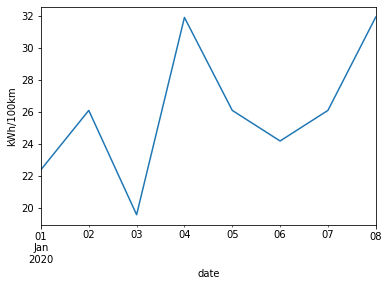

In [129]:
specific_resampled.plot(ylabel="kWh/100km")

-------------------------
d) Visualization

-------------------------

In [84]:
#fig_ged = PLT.sgplot_ged(ged.name, rng=None, to_html=False, path=None) # this looks for all strategies of a single grid availability time series, even though we provide one grid demand id

In [83]:
#fig_ged

------------------------------------------------------
### Visualize all time series of a vehicle profile
------------------------------------------------------

In [ ]:
#fig_channel = PLT.overview(ged.name)

In [85]:
#fig_channel

------------------------------------------------------------
### Export all time-series in 'db' folder to [DIETER](https://diw-evu.gitlab.io/dieter_public/dieterpy/) format
-----------------------------------------------------------------------------------------------------------
After exporting see the two CSV files at "db" folder

--------------------------------------------------------------------

In [ ]:
from emobpy import Export

In [ ]:
DB.update()
Exp = Export()
Exp.loaddata(DB)
Exp.to_csv()
Exp.save_files()

-------------------------------------------------------------------------------
### Download weather data from [Zenodo](https://zenodo.org/record/1489915)
-------------------------------------------------------------------------------
Total size: 300 MB

This function allows us to select different countries and years when creating new driving consumption time-series.

After finishing the download, you will get the location of the files on your PC. If you want to add more countries, you can edit the CSV files there.

emobpy includes Germany's weather data only for 2016. This data set has several European countries and years from 2000-2017.

-------------------------------------------------------------------------------

In [ ]:
# from emobpy import Weather

In [ ]:
# WD = Weather()

In [ ]:
# WD.download_weather_data()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
specific_resampled = pd.DataFrame()

from emobpy import Mobility
for i in range(5):
    m = Mobility(config_folder='config_files')
    m.set_params(
                 name_prefix="BEV1",
                 total_hours=8760, # one week
                 time_step_in_hrs=0.5, # 15 minutes
                 category="user_defined",
                 reference_date="01/01/2020"
                )
    m.set_stats(
                stat_ntrip_path="TripsPerDay.csv",
                stat_dest_path="DepartureDestinationTrip.csv",
                stat_km_duration_path="DistanceDurationTrip.csv",
                )
    m.set_rules(rule_key="user_defined") # see /config_files/rules.yml, it contains a dictionary
                                         # whose key must be the same as rule_key. 
                                         # To see all possible rules `from emobpy.constants import RULE; RULE`
    m.run()
    m.save_profile(folder="db", description='168 hrs 15 min step ref-date 01/01/2020')
    from emobpy import DataBase
    DB = DataBase('db')
    DB.loadfiles()
    from emobpy import Consumption, HeatInsulation, BEVspecs
    mname = m.name ###
    HI = HeatInsulation(True)            # Creating the heat insulation by copying the default configuration
    BEVS = BEVspecs()                    # Database that contains BEV models
    dataframe = BEVS.search_by_parameter()
    VW_ID3 = BEVS.model(('Volkswagen','ID.3',2020))    # Model instance that contains vehicle 
    c = Consumption(mname, VW_ID3)
    c.load_setting_mobility(DB)
    c.run(
        heat_insulation=HI,
        weather_country='DE',
        weather_year=2016,
        passenger_mass=75,                   # kg
        passenger_sensible_heat=70,          # W
        passenger_nr=1.5,                    # Passengers per vehicle including driver
        air_cabin_heat_transfer_coef=20,     # W/(m2K). Interior walls
        air_flow = 0.02,                     # m3/s. Ventilation
        driving_cycle_type='WLTC',           # Two options "WLTC" or "EPA"
        road_type=0,                         # For rolling resistance, Zero represents a new road.
        road_slope=0
        )
    c.save_profile('db')
    from emobpy import Availability
    DB.update()                               # This load new generated files that are hosted in database folder
    cname = c.name                            # getting the id of the first consumption profile


    station_distribution = {                  # Dictionary with charging stations type probability distribution per the purpose of the trip (location or destination)
        'prob_charging_point': {
            'errands': {'public': 0.5, 'none': 0.5},
            'escort': {'public': 0.5, 'none': 0.5},
            'leisure': {'public': 0.5, 'none': 0.5},
            'shopping': {'public': 0.5, 'none': 0.5},
            'home': {'public': 0.5, 'none': 0.5},
            'workplace': {'public': 0.0, 'workplace': 1.0, 'none': 0.0},   # If the vehicle is at the workplace, it will always find a charging station available (assumption)
            'driving': {'none': 0.99, 'fast75': 0.005, 'fast150': 0.005}}, # with the low probability given to fast charging is to ensure fast charging only for very long trips (assumption)
        'capacity_charging_point': {                                       # Nominal power rating of charging station in kW
            'public': 22,
            'home': 3.7,
            'workplace': 11,
            'none': 0,  # dummy station
            'fast75': 75,
            'fast150': 150}
    }
    
    ga = Availability(c.name , DB)
    ga.set_scenario(station_distribution)
    ga.run()
    ga.save_profile('db')
    
    from emobpy import Charging
    DB.update()

    specific_cons = pd.DataFrame()

    aname = ga.name                            # getting the id of the availability profile

    strategies = [
                  "immediate",                 # When battery has SOC < 100% then it charges immediatelly at a maximun power rating of the current charging station
                  "balanced",                  # When battery has SOC < 100% then it charges immediatelly but at lower rating power to ensure 100% SOC at the end (before moving to another place).
                  "from_0_to_24_at_home",      # Customized: starting time of charging (this case 0 hrs), final time of charging (this case 24 hrs), at could be one 'location' (this case 'home') or 'any'.
                  "from_23_to_8_at_any"
                 ]
    for option in strategies:
        ged = Charging(aname)
        ged.load_scenario(DB)
        ged.set_sub_scenario(option)
        ged.run()
        print(f'Creation Successful:{ged.success}')   # if False, modify the strategy to a less constrained.
        ged.save_profile('db')

        cons = ged.timeseries.consumption[ged.timeseries.consumption>0]
        mob = ged.timeseries.distance.loc[cons.index]

        specific_cons= pd.concat([cons, mob], axis=1).apply(lambda row : row["consumption"] / row["distance"] , axis=1)*100
        ts = specific_cons.resample("D").mean().fillna(specific_cons.mean())
        specific_resampled = pd.concat([specific_resampled, ts], axis = 1)




New profile running: BEV1_W53_a7209
Progress: 1% [4 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 3% [13 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 9% [33 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 9% [35 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 14% [52 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 16% [61 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 22% [83 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 23% [86 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 24% [88 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 24% [90 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 32% [117 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 41% [153 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 44% [163 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 45% [167 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 47% [172 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 48% [176 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 54% [200 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 63% [231 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 68% [249 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method 

    Day 249 'select_tour' method in loop Nr. 100. See log file BEV1_W53_a7209
       last_trip_to home                   0.40 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.27 uncompliance rate (last 30 iter)


C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method 

  Tour done: Day 249
Progress: 73% [267 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 82% [302 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 89% [326 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 90% [332 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 100% [365 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Profile done: BEV1_W53_a7209
Elapsed time (min): 0.33
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log


C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

Parameter: power
   brand                     model  year  value unit
0  Tesla             Model S P100D  2016  568.0   kw
1  Tesla  Model S Performance (SR)  2020  568.0   kw
2  Tesla  Model S Performance (AC)  2019  568.0   kw
3  Tesla   Model S P90DL Ludicrous  2016  568.0   kw
4  Tesla   Model S P90DL Ludicrous  2015  568.0   kw
5  Tesla              Model S P90D  2016  568.0   kw
6  Tesla              Model S P90D  2015  568.0   kw
7  Tesla   Model S P85DL Ludicrous  2015  568.0   kw
8  Tesla  Model S P85D 193kW+375kW  2015  568.0   kw
9  Tesla             Model S P100D  2018  568.0   kw


C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
New profile running: BEV1_W53_a7209_Volkswagen_ID.3_2020_c641a
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [698 / 698] trips
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
soc_init:0.5 --> soc_end:1.0
Profile done: BEV1_W53_a7209_Volkswagen_ID.3_2020_c641a_avai_e5e47
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
Profile done: BEV1_W53_a7209_Vol

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 2% [8 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method 

Progress: 2% [10 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 5% [19 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 22% [81 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method 

    Day 81 'select_tour' method in loop Nr. 100. See log file BEV1_W53_d52d5
       last_trip_to home                   0.53 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 81
Progress: 22% [82 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 24% [88 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method 

    Day 88 'select_tour' method in loop Nr. 100. See log file BEV1_W53_d52d5
       last_trip_to home                   0.33 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.27 uncompliance rate (last 30 iter)


C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



  Tour done: Day 88
Progress: 24% [89 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 26% [96 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 26% [98 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 32% [119 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 34% [126 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 38% [141 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 49% [181 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 61% [223 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 77% [283 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 80% [295 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 92% [336 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 95% [347 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 95% [349 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 99% [364 / 365] days
Profile done: BEV1_W53_d52d5
Elapsed time (min): 0.31
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log


C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

Parameter: power
   brand                     model  year  value unit
0  Tesla             Model S P100D  2016  568.0   kw
1  Tesla  Model S Performance (SR)  2020  568.0   kw
2  Tesla  Model S Performance (AC)  2019  568.0   kw
3  Tesla   Model S P90DL Ludicrous  2016  568.0   kw
4  Tesla   Model S P90DL Ludicrous  2015  568.0   kw
5  Tesla              Model S P90D  2016  568.0   kw
6  Tesla              Model S P90D  2015  568.0   kw
7  Tesla   Model S P85DL Ludicrous  2015  568.0   kw
8  Tesla  Model S P85D 193kW+375kW  2015  568.0   kw
9  Tesla             Model S P100D  2018  568.0   kw
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fall

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [649 / 649] trips
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
soc_init:0.5 --> soc_end:0.956
Profile done: BEV1_W53_d52d5_Volkswagen_ID.3_2020_8a2d9_avai_35ffa
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
Profile done: BEV1_W53_d52d5_Volkswagen_ID.3_2020_8a2d9_avai_35ffa_immediate_00380
Creation Successful:True
Profile done: BEV1_W53_d52d5_Volkswagen_ID.3_2020_8a2d9_avai_35ffa_balanced_4a9d0
Creation Successful:True
Profile done: BEV1_W53_d52d5_Volkswagen_ID.3_2020_8a2d9_avai_35ffa_from_0_to_24_at_home_55119
Creation Successful:True
Profile done: BEV1_W53_d52d5_Volkswagen_ID.3_2020_8a2d9_avai_35ffa_from_23_to_8_at_any_8ea06
Creation Successful:True
New profile running: BEV1_W53_d077b
Progress: 3% [11 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 3% [12 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 6% [25 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 19% [72 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 29% [109 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 30% [110 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 43% [158 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 50% [184 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 53% [196 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 59% [218 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 61% [226 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 65% [238 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 81% [299 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 83% [303 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 83% [304 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 95% [347 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 95% [348 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method 

Progress: 95% [350 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 100% [365 / 365] days
Profile done: BEV1_W53_d077b
Elapsed time (min): 0.32
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log


C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

Parameter: power
   brand                     model  year  value unit
0  Tesla             Model S P100D  2016  568.0   kw
1  Tesla  Model S Performance (SR)  2020  568.0   kw
2  Tesla  Model S Performance (AC)  2019  568.0   kw
3  Tesla   Model S P90DL Ludicrous  2016  568.0   kw
4  Tesla   Model S P90DL Ludicrous  2015  568.0   kw
5  Tesla              Model S P90D  2016  568.0   kw
6  Tesla              Model S P90D  2015  568.0   kw
7  Tesla   Model S P85DL Ludicrous  2015  568.0   kw
8  Tesla  Model S P85D 193kW+375kW  2015  568.0   kw
9  Tesla             Model S P100D  2018  568.0   kw
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fall

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [664 / 664] trips
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
soc_init:0.5 --> soc_end:1.0
Profile done: BEV1_W53_d077b_Volkswagen_ID.3_2020_b1532_avai_45455
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
Profile done: BEV1_W53_d077b_Volkswagen_ID.3_2020_b1532_avai_45455_immediate_57829
Creation Successful:True
Profile done: BEV1_W53_d077b_Volkswagen_ID.3_2020_b1532_avai_45455_balanced_d8811
Creation Successful:True
Profile done: BEV1_W53_d077b_Volkswagen_ID.3_2020_b1532_avai_45455_from_0_to_24_at_home_72669_FAIL
Creation Successful:False
Profile done: BEV1_W53_d077b_Volkswagen_ID.3_2020_b1532_avai_45455_from_23_to_8_at_any_ac97a_FAIL
Creation Successful:False
New profile running: BEV1_W53_037ff
Progress: 10% [37 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 11% [42 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method 

Progress: 12% [47 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method 

Progress: 14% [53 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 16% [62 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 18% [68 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 23% [86 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 24% [88 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 24% [90 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 27% [101 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 28% [105 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 29% [107 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 30% [111 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 31% [114 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method 

Progress: 31% [116 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 38% [142 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 45% [165 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method 

Progress: 46% [171 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 51% [188 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 77% [282 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 79% [289 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 81% [298 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 88% [324 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 89% [327 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 98% [359 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 98% [360 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 98% [361 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 100% [365 / 365] days
Profile done: BEV1_W53_037ff
Elapsed time (min): 0.37
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log


C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

Parameter: power
   brand                     model  year  value unit
0  Tesla             Model S P100D  2016  568.0   kw
1  Tesla  Model S Performance (SR)  2020  568.0   kw
2  Tesla  Model S Performance (AC)  2019  568.0   kw
3  Tesla   Model S P90DL Ludicrous  2016  568.0   kw
4  Tesla   Model S P90DL Ludicrous  2015  568.0   kw
5  Tesla              Model S P90D  2016  568.0   kw
6  Tesla              Model S P90D  2015  568.0   kw
7  Tesla   Model S P85DL Ludicrous  2015  568.0   kw
8  Tesla  Model S P85D 193kW+375kW  2015  568.0   kw
9  Tesla             Model S P100D  2018  568.0   kw
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fall

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

New profile running: BEV1_W53_037ff_Volkswagen_ID.3_2020_4b2c9
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [705 / 705] trips
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
soc_init:0.5 --> soc_end:0.962
Profile done: BEV1_W53_037ff_Volkswagen_ID.3_2020_4b2c9_avai_110d7
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
Profile done: BEV1_W53_037ff_Volkswagen_ID.3_2020_4b2c9_avai_110d7_immediate_0e1c3
Creation Successful:True
Profile done: BEV1_W53_037ff_Volkswagen_ID.3_2020_4b2c9_avai_110d7_balanced_c1cd3
Creation Successful:True
Profile done: BEV1_W53_037ff_Volkswagen_ID.3_2020_4b2c9_avai_110d7_from_0_to_24_at_home_45592_FAIL
Creation Successful:False
Profile done: BEV1_W53_037ff_Volkswagen_ID.3_2020_4b2c9_avai_110d7_from_23_to_8_at_any_686b8_FAIL
Creation Successful:False
New profile running: BEV1

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 10% [39 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 11% [41 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 13% [50 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 15% [55 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 16% [59 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 17% [65 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 29% [107 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 32% [118 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 32% [119 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 38% [140 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 43% [158 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 44% [162 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 47% [172 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 48% [176 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 48% [177 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 51% [189 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 53% [195 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 55% [203 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 58% [215 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 70% [259 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 75% [275 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 81% [296 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 86% [314 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 90% [330 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 90% [332 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 91% [333 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method 

Progress: 93% [340 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 93% [342 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Progress: 100% [365 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Profile done: BEV1_W53_c986e
Elapsed time (min): 0.32
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log


C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

Parameter: power
   brand                     model  year  value unit
0  Tesla             Model S P100D  2016  568.0   kw
1  Tesla  Model S Performance (SR)  2020  568.0   kw
2  Tesla  Model S Performance (AC)  2019  568.0   kw
3  Tesla   Model S P90DL Ludicrous  2016  568.0   kw
4  Tesla   Model S P90DL Ludicrous  2015  568.0   kw
5  Tesla              Model S P90D  2016  568.0   kw
6  Tesla              Model S P90D  2015  568.0   kw
7  Tesla   Model S P85DL Ludicrous  2015  568.0   kw
8  Tesla  Model S P85D 193kW+375kW  2015  568.0   kw
9  Tesla             Model S P100D  2018  568.0   kw
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fall

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [649 / 649] trips
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
soc_init:0.5 --> soc_end:0.729
Profile done: BEV1_W53_c986e_Volkswagen_ID.3_2020_80481_avai_9a323
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
Profile done: BEV1_W53_c986e_Volkswagen_ID.3_2020_80481_avai_9a323_immediate_57419
Creation Successful:True
Profile done: BEV1_W53_c986e_Volkswagen_ID.3_2020_80481_avai_9a323_balanced_54a17
Creation Successful:True
Balance: -0.01. Consumption: 1482.66. charge_battery: 1482.02. sto_init: 22.5. sto_end: 21.87
Profile done: BEV1_W53_c986e_Volkswagen_ID.3_2020_80481_avai_9a323_from_0_to_24_at_home_0dcfa
Creation Successful:True
Balance: -0.01. Consumption: 1482.66. charge_battery: 1482.02. sto_init: 22.5. sto_end: 21.87
Profile done: BEV1_W53_c986e_V

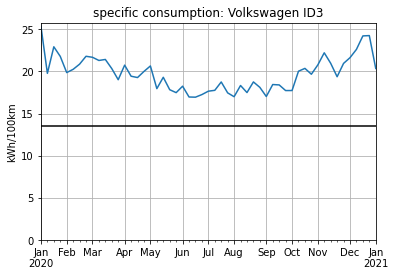

In [22]:
specific_resampled.to_pickle("specific_consumption")
#specific_resampled = pd.read_pickle("specific_consumption")

df = specific_resampled.mean(1).resample("1W").mean()
df.plot(ylim=0, ylabel="kWh/100km", title = "specific consumption: Volkswagen ID3")
plt.hlines(13.5, df.index[0],  df.index[-1], color="black")
plt.grid()
plt.savefig('specific_consumptoin.png')

In [5]:
import pandas as pd 
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [7]:
ged_import = "demand"
df = open("demand", "wb")#pd.read_pickle("demand")
df.index = pd.DatetimeIndex(df.index)

In [11]:
df_new = df.loc[df.index.date<pd.Timestamp(2020,1,8).date()]

In [12]:
def start_and_end_week(df, column_values='charge_grid'):
    '''Remove first and last week as days are missing causing inconsistent average'''
    dt = df.reset_index()
    dt["date"] = pd.to_datetime(dt["date"])
    dt['half'] = dt['date'] - min(dt['date'])
    dt = dt.set_index('date')
    dt = data_curation(dt,column_values=column_values).T
    sr = dt['charge_grid']
    start = len(sr[sr.columns[0]].dropna())
    ends = len(sr[sr.columns[-1]].dropna())
    dt = df.reset_index()
    dt['half'] = dt['date'] - min(dt['date'])
    #dt = dt[(dt['half'] <= pd.to_timedelta(start,'H')) & (dt['half'] >= pd.to_timedelta(dt['hh'].max() - ends,'H'))].copy()
    df = dt.set_index('date')
    return df
def data_curation(df, column_values='charge_grid'):
    ''' 
    Convert data frame with all profiles to days of the week and hours of the day
    id represents every profile
    step1 sum up all profiles
    step2 makes the average
    '''
    profiles_n = len(set(df['id'].values))
    step1 = df.groupby([df.index.day_name(),df.index.hour,df.index.isocalendar().week])[column_values].sum()
    step2 = step1/profiles_n
    step3 = pd.DataFrame(step2)
    step4 = step3.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],level=0)
    return step4.unstack().T 

def start_and_end_week_full(df, column_values='charge_grid'):
    '''Remove first and last week as days are missing causing inconsistent average'''
    dt = df.reset_index()
    dt['half'] = dt['date'] - min(dt['date'])
    dt = dt.set_index('date')
    dt = data_curation(dt,column_values=column_values).T
    sr = dt['charge_grid']
    start = len(sr[sr.columns[0]].dropna())
    ends = len(sr[sr.columns[-1]].dropna())
    dt = df.reset_index()
    dt['half'] = dt['date'] - min(dt['date'])
    dt = dt[(dt['half'] <= pd.to_timedelta(start,'H')) & (dt['half'] >= pd.to_timedelta(dt['hh'].max() - ends,'H'))].copy()
    df = dt.set_index('date')
    return df

def shares_plot(df, column_values='state', order=['driving','workplace','errands','escort','shopping','leisure','home']):
    '''
    Plot of category shares either locations ('states') or charging point names ('charging_point')
    '''
    sr_count = df.groupby([df.index.day_name(),df.index.hour,column_values])[column_values].count()
    df_count = pd.DataFrame(sr_count).rename(columns={column_values:'count'}).unstack(level=-1).fillna(0)
    df_count.columns = df_count.columns.droplevel()
    present = [exists for exists in order if exists in df_count.columns]
    df_count_sorted = df_count[present[::-1]].reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],level=0)
    df_new_index = (df_count_sorted.T/df_count_sorted.T.sum(axis=0)).T
    df_new_index.loc[:,'new_index'] = [d[:3] for d,h in df_new_index.index.values]
    #[[str(h) if h > 9 else '0'+str(h)][0] ]+ ',' + d[:3] for d,h in df_new_index.index.values]
    df_new_index.set_index('new_index',inplace=True)
    df_new_index.index.name = 'January'
    return df_new_index
    fig = df_new_index#.iplot(kind='area', fill=True,asFigure=True)
    fig['layout'] = {}
    return fig

def box_plot(df, name, column_values='charge_grid', factor=1, color='#14868c',legendname_position=2):
  '''
  Box plot of distance, consumption, or charge_grid. 
  column_values must exist in the df
  '''
  dt = data_curation(df,column_values=column_values)
  data = []
  # Every boxplot has given name. The legend takes the name, legendgroup allows all boxplot with the same identifier have the same color
  flag = legendname_position  # as we the first boxplot is used as xaxis tick we move the name to the next position
  flagcompare = 0
  for key, v in dt.iteritems():
      flagcompare += 1
      data.append({'boxpoints': False, # 'suspectedoutliers' or False
                        'line': {'width': 1.2},
                      'marker': {'color': color},
                        'name': f'''{str(key[1]).zfill(2)},{key[0][0:3]}''' if flag != flagcompare else name,
                  'orientation': 'v',
                        'type': 'box',
                            'y': v.values*factor,
                        'xaxis': 'x',
                      'jitter': 0.0,
                'whiskerwidth': 1.0,
                      'notched': False,
                  'notchwidth': 0.2,
                  'showlegend': False if flag != flagcompare else True,
                  'legendgroup': name
                  })
  return go.Figure(data)

In [13]:
dt = start_and_end_week(df_new)



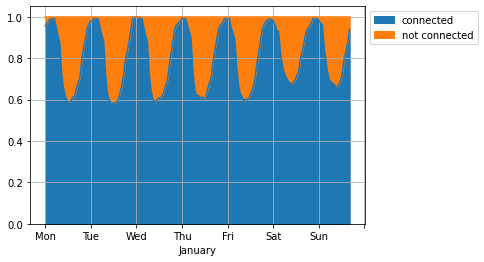

In [15]:
df_charge = shares_plot(dt, column_values='charging_point', order=['none', 'public', 'fast150', 'fast75'])
df_charge = df_charge.rename(columns={"public": "connected", "none": "not connected"})
ax = df_charge.plot.area()
plt.grid()
ax.legend(bbox_to_anchor=(1,1))

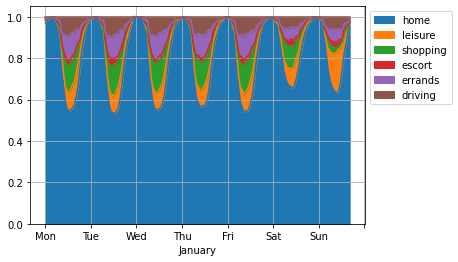

In [16]:
df_ = shares_plot(dt) # with state as default
ax = df_.plot.area()
plt.grid()
ax.legend(bbox_to_anchor=(1,1))